# **AICP ML Internship 3.0 Task Week 5**

Instagram Reach Forecasting

Instagram reach forecasting is the process of predicting the number of people that an Instagram post, story, or other content will be reached, based on historical data and various
other factors.


For content creators and anyone using Instagram professionally, predicting the reach can be
valuable for planning and optimizing their social media strategy. By understanding how their
content is performing, creators can make informed decisions about when to publish, what types
of content to create, and how to engage their audience. It can lead to increased engagement,
better performance metrics, and ultimately, greater success on the platform.

Find dataset “Instagram-Reach.csv”

Below are the features in the data:

1.Date

2.Instagram Reach


You are required to identify the patterns and trends in the data, identify any seasonality or cyclic
behaviour, and detect any outliers or anomalies. Based on the insights gained from the analysis,
develop a predictive model that can forecast the reach of the Instagram account for the next
period of time.

Q.1: **Import data and check null values, column info, and descriptive statistics of the data.**

In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/Instagram-Reach.csv'
df = pd.read_csv(file_path)

# Check for null values
null_values = df.isnull().sum()

# Get column information
column_info = df.info()

# Display descriptive statistics
descriptive_stats = df.describe()

# Print results
print("Null values in each column:\n", null_values)
print("\nColumn information:\n", column_info)
print("\nDescriptive statistics:\n", descriptive_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             365 non-null    object
 1   Instagram reach  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB
Null values in each column:
 Date               0
Instagram reach    0
dtype: int64

Column information:
 None

Descriptive statistics:
        Instagram reach
count       365.000000
mean      50474.712329
std       30051.787552
min        7620.000000
25%       25070.000000
50%       43987.000000
75%       68331.000000
max      161998.000000


Q.2: **You can convert the Date column into datetime datatype to move forward.**

In [2]:
# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Verify the conversion
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             365 non-null    datetime64[ns]
 1   Instagram reach  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB
None


**Analyzing Reach**

Q.3: **Analyze the trend of Instagram reach over time using a line chart**

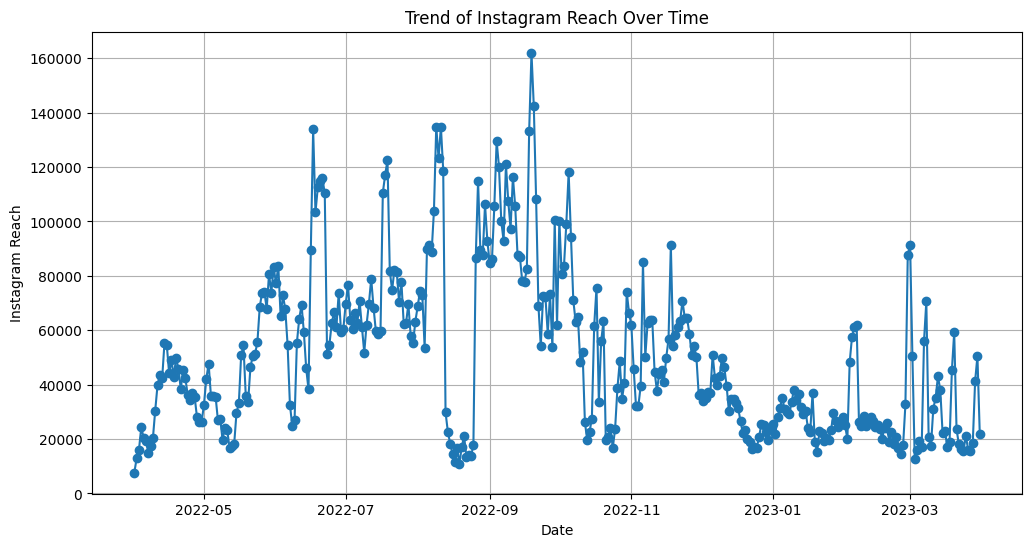

In [5]:
import matplotlib.pyplot as plt

# Assuming the correct column name is 'Instagram Reach'
# Plot the trend of Instagram reach over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Instagram reach'], marker='o')
plt.title('Trend of Instagram Reach Over Time')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.grid(True)
plt.show()


Q.4: **Analyze Instagram reach for each day using a bar chart.**

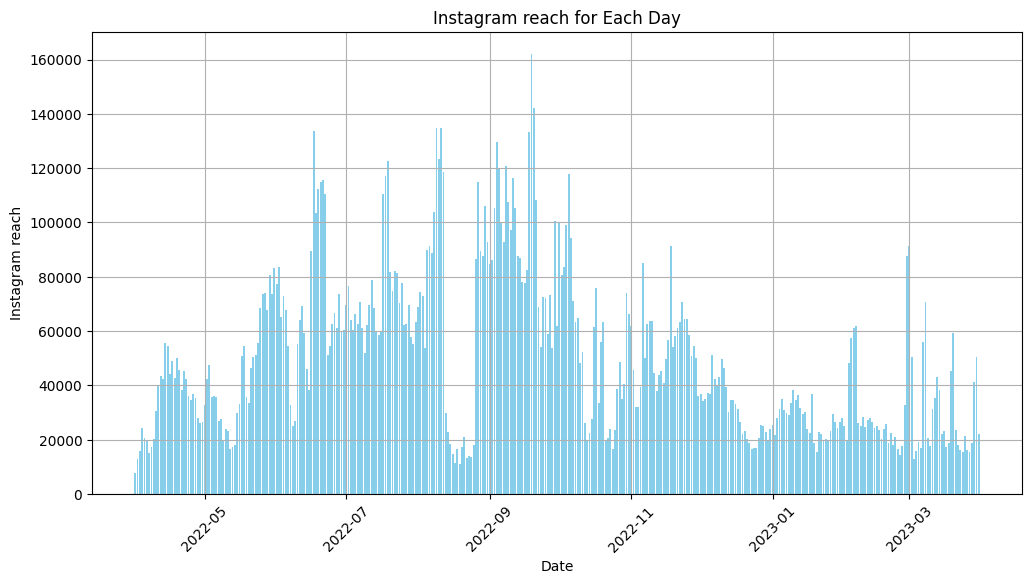

In [7]:
# Plot the Instagram reach for each day using a bar chart
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Instagram reach'], color='skyblue')
plt.title('Instagram reach for Each Day')
plt.xlabel('Date')
plt.ylabel('Instagram reach')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Q.5: **Analyze the distribution of Instagram reach using a box plot.**

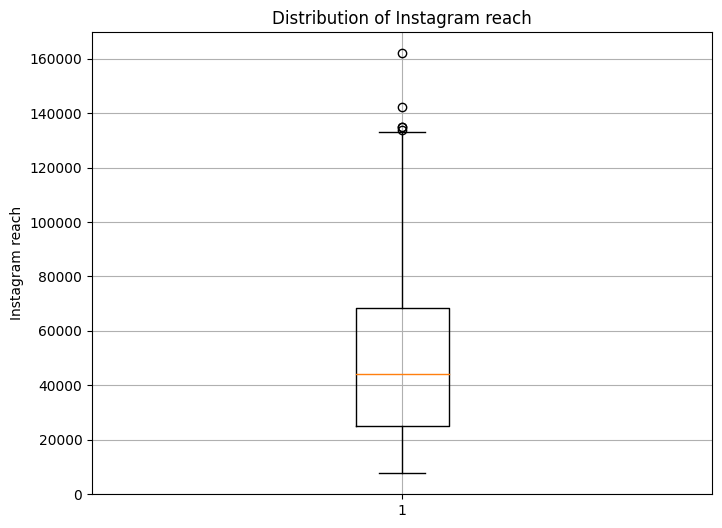

In [8]:
# Plot the distribution of Instagram reach using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Instagram reach'])
plt.title('Distribution of Instagram reach')
plt.ylabel('Instagram reach')
plt.grid(True)
plt.show()

Q.5: **Now create a day column and analyze reach based on the days of the week. To create a day column, you can use the python method to extract the day of the week from the Date column**

In [9]:
# Create a Day column from the Date column
df['Day'] = df['Date'].dt.day_name()

# Group by the Day column and calculate mean, median, and standard deviation
day_grouped = df.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reset_index()

# Print the results
print(day_grouped)


         Day          mean   median           std
0     Friday  46666.849057  35574.0  29856.943036
1     Monday  52621.692308  46853.0  32296.071347
2   Saturday  47374.750000  40012.0  27667.043634
3     Sunday  53114.173077  47797.0  30906.162384
4   Thursday  48570.923077  39150.0  28623.220625
5    Tuesday  54030.557692  48786.0  32503.726482
6  Wednesday  51017.269231  42320.5  29047.869685


Q.6: **Now analyze the reach based on the days of the week. For this, you can group the DataFrame by the Day column and calculate the mean, median, and standard deviation of the Instagram reach column for each day.**

<ipython-input-10-0f0e89c60cd7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day', y='mean', data=day_grouped, palette='viridis')


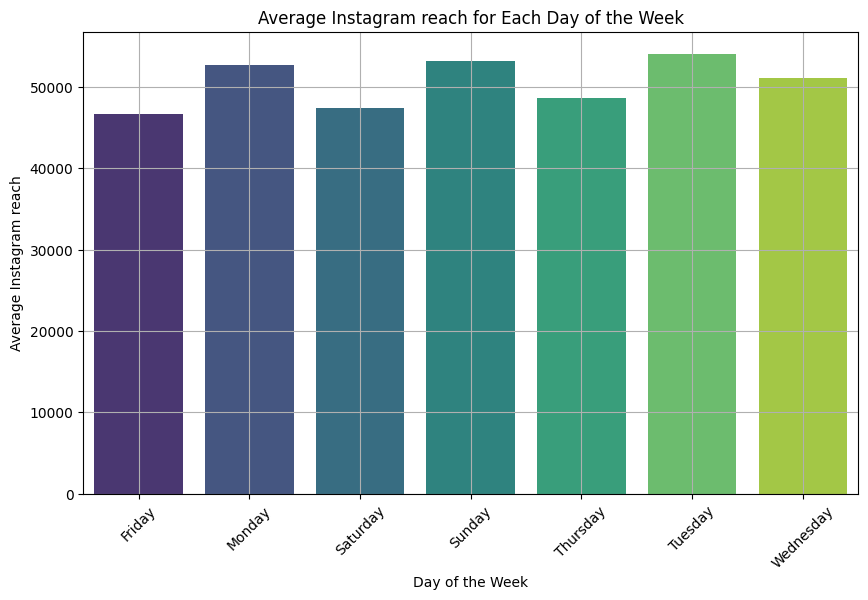

In [10]:
import seaborn as sns

# Plot the reach for each day of the week using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='mean', data=day_grouped, palette='viridis')
plt.title('Average Instagram reach for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Instagram reach')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Q.7: **Now create a bar chart to visualize the reach for each day of the week. To forecast reach, you can use Time Series Forecasting**

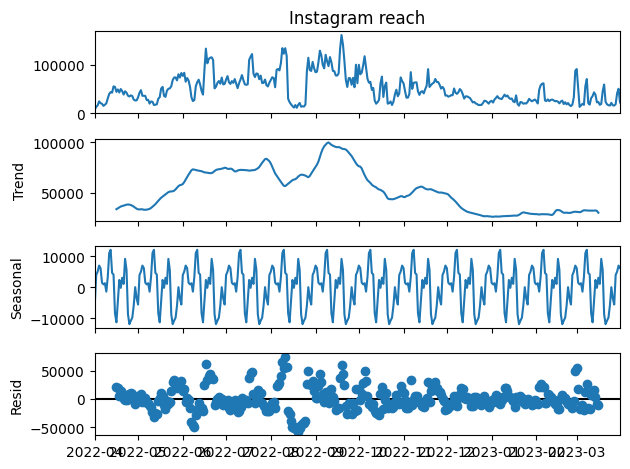

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the Date column as the index
df.set_index('Date', inplace=True)

# Decompose the time series
result = seasonal_decompose(df['Instagram reach'], model='additive', period=30)

# Plot the decomposition
result.plot()
plt.show()


Q.8: **Check the Trends and Seasonal patterns of Instagram reach.**

<Figure size 1200x600 with 0 Axes>

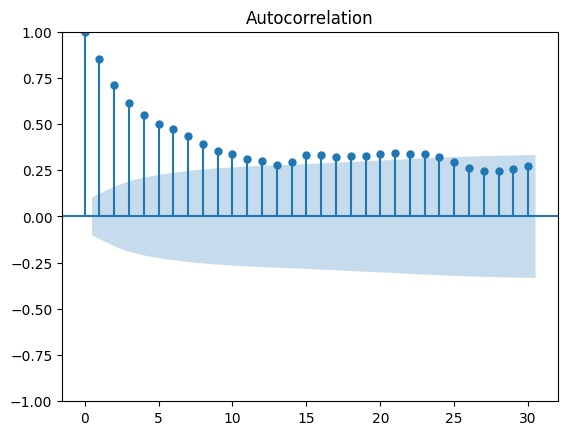

<Figure size 1200x600 with 0 Axes>

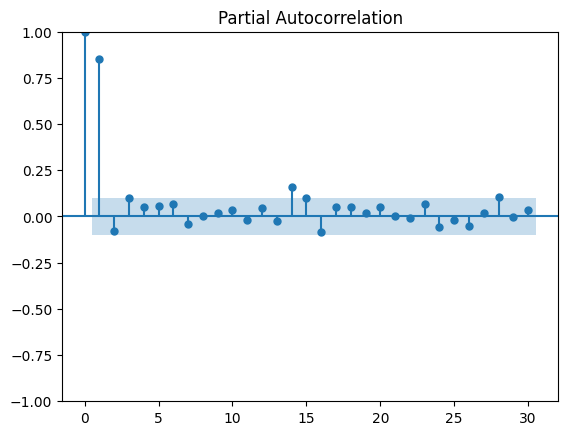

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the autocorrelation and partial autocorrelation plots
plt.figure(figsize=(12, 6))
plot_acf(df['Instagram reach'], lags=30)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Instagram reach'], lags=30)
plt.show()


Q.9: **You can use the SARIMA model to forecast the reach of the Instagram account. You need
to find p, d, and q values to forecast the reach of Instagram. To find the value of d, you can use
the autocorrelation plot, and to find the value of q, you can use a partial autocorrelation plot.
The value of d will be 1. You have to visualize an autocorrelation plot to find the value of p,
partial autocorrelation plot to find the value of q.**

<Figure size 1200x600 with 0 Axes>

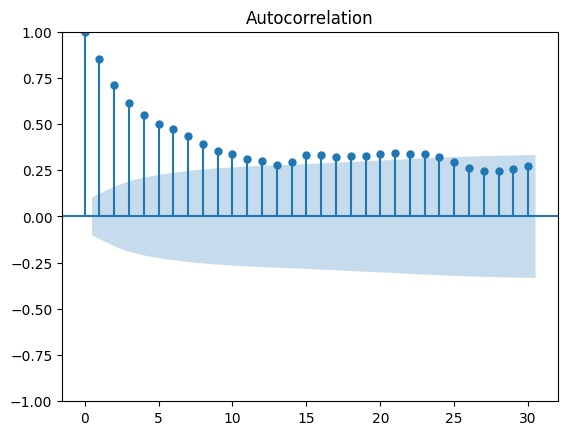

<Figure size 1200x600 with 0 Axes>

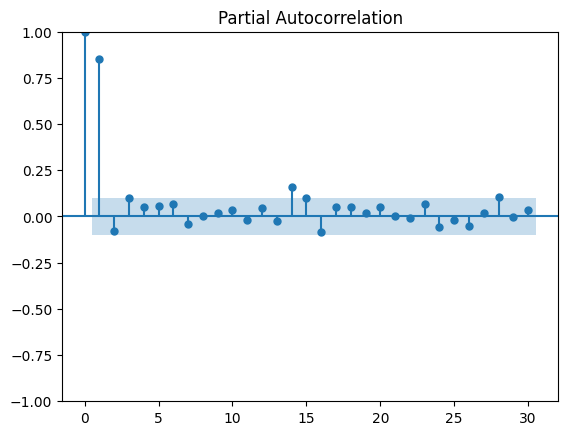

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the autocorrelation and partial autocorrelation plots
plt.figure(figsize=(12, 6))
plot_acf(df['Instagram reach'], lags=30)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Instagram reach'], lags=30)
plt.show()


Q.10: **You have to train a model using SARIMA and make predictions.**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


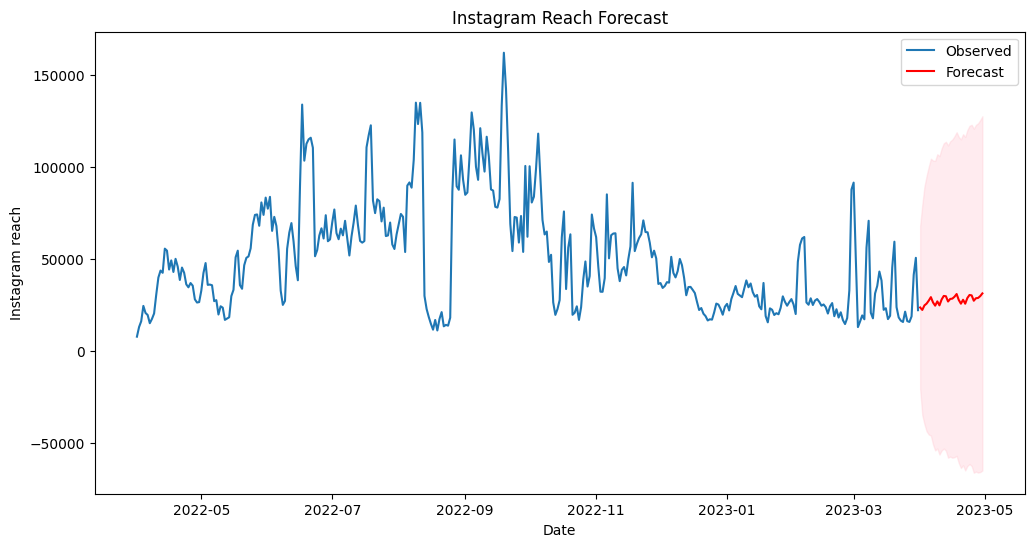

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model with assumed parameters
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12

model = SARIMAX(df['Instagram reach'], order=(p, d, q), seasonal_order=(P, D, Q, S), enforce_stationarity=False, enforce_invertibility=False)

# Fit the model
model_fit = model.fit(disp=False)

# Make predictions
forecast = model_fit.get_forecast(steps=30)
forecast_ci = forecast.conf_int()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Instagram reach'], label='Observed')
plt.plot(forecast_ci.index, forecast.predicted_mean, label='Forecast', color='r')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Instagram reach')
plt.title('Instagram Reach Forecast')
plt.legend()
plt.show()
